In [15]:
import pandas as pd
import edhec_risk_ph as erk
%load_ext autoreload
%autoreload 2


In [8]:
ind = pd.read_csv('../data/ind30_m_vw_rets.csv', parse_dates=True, index_col=0)/100
ind.head()

/var/folders/qj/0m_9ythn431_06y4v80zxls00000gn/T/ipykernel_9522/2621251300.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv('../data/ind30_m_vw_rets.csv', parse_dates=True, index_col=0)/100


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [13]:
ind.index = pd.to_datetime(ind.index, format='%Y%m').to_period('M')

In [15]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [16]:
#to remove spaces in column names
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [2]:
import edhec_risk_ph as erk
ind = erk.get_ind_returns()
ind.shape

(1110, 30)

In [4]:
erk.drawdown(ind['Food']).min()

Wealth      0.577854
Peaks       1.005600
Drawdown   -0.722186
dtype: float64

In [5]:
{col: erk.drawdown(ind[[col]])['Drawdown'].min() for col in ind.columns}

{'Food': Food   -0.722186
 dtype: float64,
 'Beer': Beer   -0.885744
 dtype: float64,
 'Smoke': Smoke   -0.598755
 dtype: float64,
 'Games': Games   -0.958661
 dtype: float64,
 'Books': Books   -0.915794
 dtype: float64,
 'Hshld': Hshld   -0.8871
 dtype: float64,
 'Clths': Clths   -0.762776
 dtype: float64,
 'Hlth': Hlth   -0.746865
 dtype: float64,
 'Chems': Chems   -0.859568
 dtype: float64,
 'Txtls': Txtls   -0.875844
 dtype: float64,
 'Cnstr': Cnstr   -0.887397
 dtype: float64,
 'Steel': Steel   -0.917775
 dtype: float64,
 'FabPr': FabPr   -0.906982
 dtype: float64,
 'ElcEq': ElcEq   -0.928874
 dtype: float64,
 'Autos': Autos   -0.901429
 dtype: float64,
 'Carry': Carry   -0.897952
 dtype: float64,
 'Mines': Mines   -0.861505
 dtype: float64,
 'Coal': Coal   -0.973579
 dtype: float64,
 'Oil': Oil   -0.76219
 dtype: float64,
 'Util': Util   -0.856414
 dtype: float64,
 'Telcm': Telcm   -0.717741
 dtype: float64,
 'Servs': Servs   -0.864965
 dtype: float64,
 'BusEq': BusEq   -0.846242

In [16]:
min_drawdowns = []
dates = []
industries = []

for col in ind.columns:
    dd = erk.drawdown(ind[[col]])['Drawdown'].iloc[:, 0]  # Get first column of 'Drawdown'
    min_drawdowns.append(dd.min())
    dates.append(dd.idxmin())
    industries.append(col)

df = pd.DataFrame({
    'Industry': industries,
    'Min Drawdown': min_drawdowns,
    'Date': dates
}).set_index('Industry').sort_values('Date')

In [17]:
df

,Min Drawdown,Date
Industry,,
Beer,-0.885744,1932-05
Meals,-0.843806,1932-05
Whlsl,-0.978122,1932-05
Hlth,-0.746865,1932-05
BusEq,-0.846242,1932-05
Cnstr,-0.887397,1932-05
Steel,-0.917775,1932-05
Oil,-0.762190,1932-05
ElcEq,-0.928874,1932-05


<Axes: >

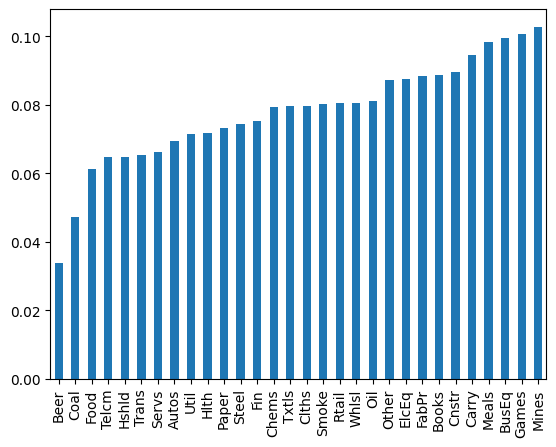

In [22]:
cols_of_interest = ['Food', 'Beer', 'Smoke', 'Coal', 'Fin']
erk.var_gaussian(ind, modified=True).sort_values().plot.bar()

<Axes: >

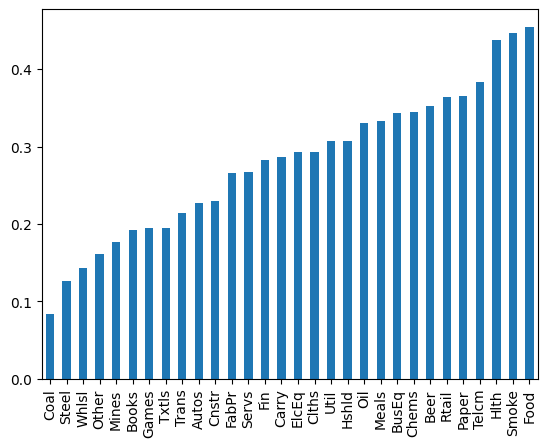

In [24]:
erk.sharpe_ratio(ind, riskfree_rate=0.03, periods_per_year=12).sort_values().plot.bar()

<Axes: >

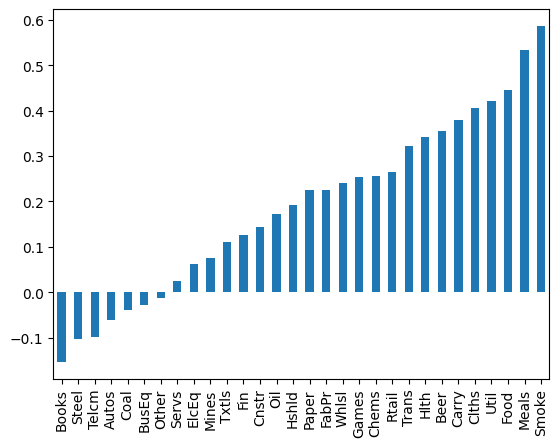

In [25]:
erk.sharpe_ratio(ind["2000":], riskfree_rate=0.03, periods_per_year=12).sort_values().plot.bar()

In [27]:
ind[:-1]

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0221,0.0350,0.0524,-0.0612,-0.0417,0.0232,0.0035,0.0612,0.0485,-0.0889,...,0.0268,0.0203,0.0277,0.0595,0.0791,0.0239,0.0355,0.0116,0.0426,0.0604
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599


In [21]:
import yfinance as yf

# Download SCHD data
#schd = yf.download('SCHD', start='2020-01-01', end='2024-12-31')
stocks = ['SCHD','VOO','VTI','SPY','IVV','GOOGL','AAPL','MSFT','AMZN','VIG','NFLX',
          'NVDA','IBM','BMY','FTNT','PSTG','ASML','AVNT','PWR','TTD','COST','VIG',
          'AES','SGMO','NVO','VIGI','VYM','SAM','SCHY','VMBS']
# Or for more recent data (last year)
hist = yf.download(stocks, period='10y',auto_adjust=True)[['Close','Volume']]

# Or use the Ticker object for more options
#ticker = yf.Ticker('SCHD')
#schd = ticker.history(period='max')  # Get all available historical data

[*********************100%***********************]  29 of 29 completed


In [50]:
pd.DataFrame(stocks, columns=["ticker"]).to_csv('../data/stocks_list.csv', index=False)

In [22]:
hist = hist['Close']
hist.head()

Ticker,AAPL,AES,AMZN,ASML,AVNT,BMY,COST,FTNT,GOOGL,IBM,...,SCHY,SGMO,SPY,TTD,VIG,VIGI,VMBS,VOO,VTI,VYM
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-28,26.803022,7.677873,30.855000,84.563904,26.529776,48.312618,132.591278,6.994,36.593609,87.715996,...,NaN,7.14,176.565598,NaN,65.242180,NaN,40.916290,161.219910,90.588715,50.096405
2015-10-29,27.086168,7.663941,31.327499,83.404266,26.682072,48.112476,133.028351,6.812,36.987392,87.541611,...,NaN,7.69,176.464218,NaN,65.217445,NaN,40.824177,161.160965,90.453369,49.957039
2015-10-30,26.854708,7.629106,31.295000,84.065605,26.802292,47.140358,132.893906,6.872,36.616947,87.248871,...,NaN,7.05,175.703690,NaN,64.854889,NaN,40.893261,160.344788,90.106544,49.824982
2015-11-02,27.232243,7.677876,31.417500,85.261505,27.379374,46.997406,133.759537,6.954,37.130905,87.429489,...,NaN,7.88,177.782440,NaN,65.382248,NaN,40.871735,162.246490,91.290726,50.367840
2015-11-03,27.544613,7.615171,31.265499,86.167488,27.267164,47.233280,133.465378,6.932,37.184540,88.370010,...,NaN,7.90,178.297913,NaN,65.571762,NaN,40.864044,162.759750,91.519112,50.514545


In [57]:
print(type(retme))

<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='Ticker'>

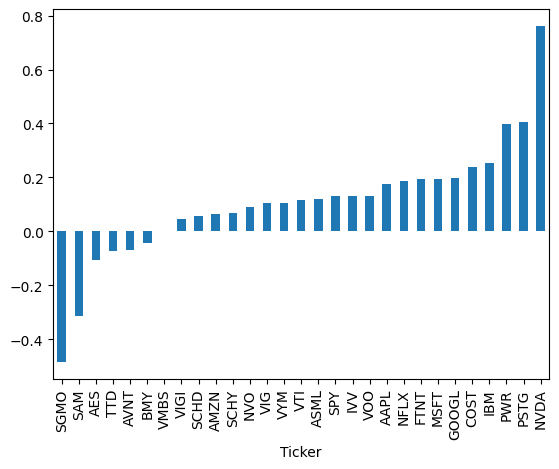

In [25]:
retme = erk.calculate_daily_returns(hist)
retme_annualized = erk.annualize_rets(retme, periods_per_year=252)
retme_annualized.sort_values().plot.bar()


<Axes: xlabel='Ticker'>

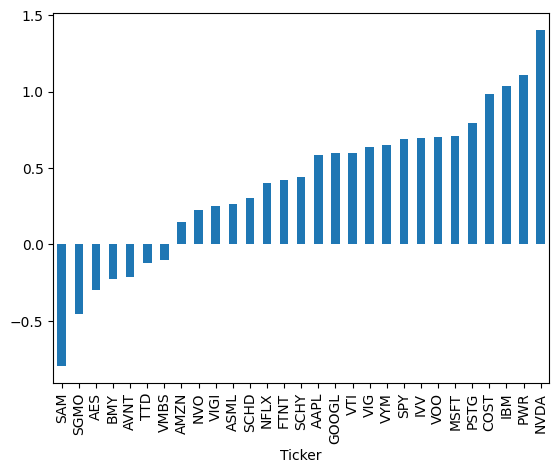

In [26]:
erk.sharpe_ratio(retme["2020":], riskfree_rate=0.01, periods_per_year=252).sort_values().plot.bar()

<Axes: xlabel='Ticker'>

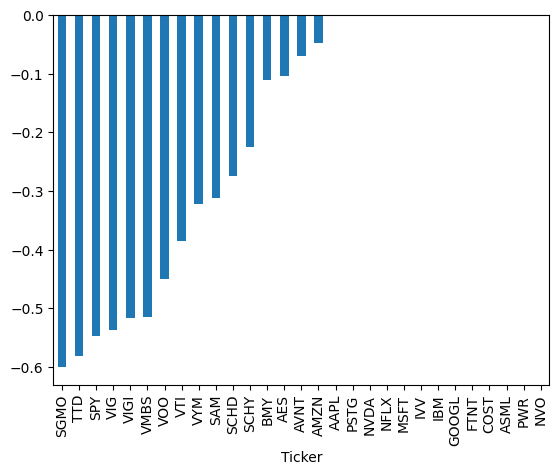

In [34]:
erk.drawdown(retme_annualized)['Drawdown'].sort_values().plot.bar()

<Axes: xlabel='Ticker'>

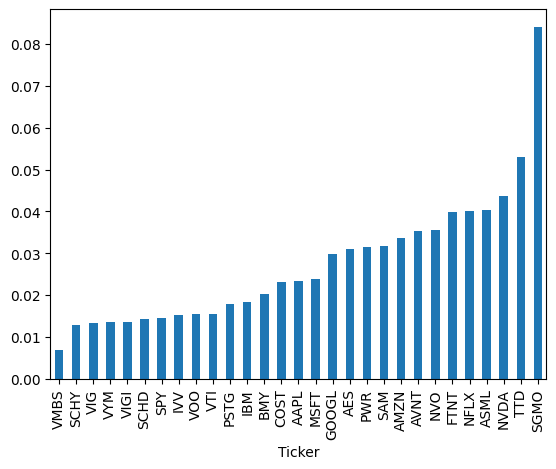

In [35]:
erk.var_gaussian(retme, modified=True).sort_values().plot.bar()

<Axes: xlabel='Ticker'>

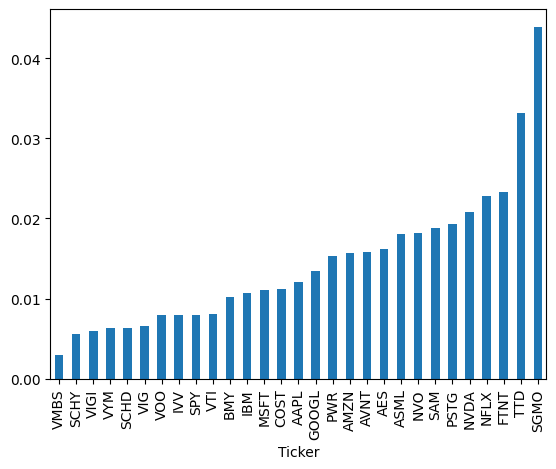

In [36]:
erk.semi_deviation(retme).sort_values().plot.bar()

<Axes: xlabel='Ticker'>

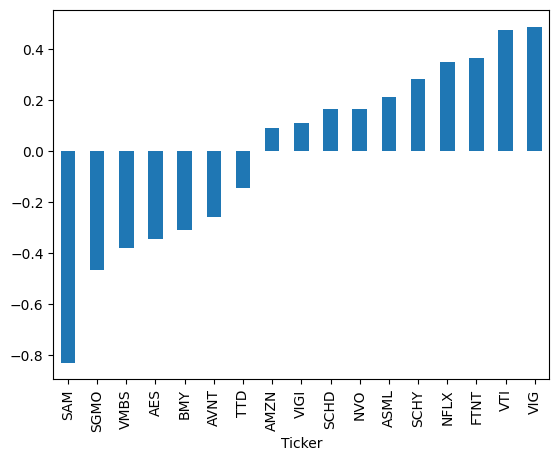

In [48]:
sr = erk.sharpe_ratio(retme, riskfree_rate=0.03, periods_per_year=252)
sr[sr<=0.5].sort_values().plot.bar()

In [51]:
tsla = erk.get_from_yahoo('TSLA', period='5y')
tsla.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,Volume
Ticker,TSLA,TSLA
Date,,
2020-10-28,135.339996,76354200
2020-10-29,136.943329,67965900
2020-10-30,129.346664,127533900
2020-11-02,133.503326,87063300
2020-11-03,141.300003,103055100


In [55]:
retme_annualized.head()

Ticker
AAPL    0.175432
AES    -0.104574
AMZN    0.063372
ASML    0.120566
AVNT   -0.069049
dtype: float64

In [65]:
cov = retme.cov()*252


In [66]:
cov

Ticker,AAPL,AES,AMZN,ASML,AVNT,BMY,COST,FTNT,GOOGL,IBM,...,SCHY,SGMO,SPY,TTD,VIG,VIGI,VMBS,VOO,VTI,VYM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.078938,0.032449,0.056854,0.064259,0.047587,0.008204,0.030905,0.051574,0.051755,0.020308,...,0.017709,0.048646,0.037820,0.079322,0.028332,0.023436,0.003129,0.037186,0.037844,0.023225
AES,0.032449,0.145433,0.037993,0.053696,0.058015,0.020867,0.019204,0.036685,0.030760,0.021279,...,0.022056,0.064177,0.031504,0.062183,0.026958,0.024785,0.005777,0.030940,0.032870,0.027637
AMZN,0.056854,0.037993,0.127655,0.081879,0.056068,0.003177,0.035528,0.063578,0.070389,0.017788,...,0.017892,0.079275,0.045026,0.121900,0.030269,0.027080,0.003694,0.044436,0.045869,0.024187
ASML,0.064259,0.053696,0.081879,0.172952,0.073543,0.003720,0.039627,0.078030,0.067858,0.029710,...,0.027850,0.070561,0.051917,0.124875,0.037488,0.039739,0.003791,0.051231,0.052979,0.031042
AVNT,0.047587,0.058015,0.056068,0.073543,0.137961,0.016594,0.028968,0.049846,0.046142,0.030395,...,0.027991,0.103629,0.043447,0.100332,0.037479,0.033011,0.005058,0.042759,0.045707,0.037596
BMY,0.008204,0.020867,0.003177,0.003720,0.016594,0.054012,0.005290,0.007161,0.005207,0.010647,...,0.008162,0.037800,0.008731,0.006494,0.010618,0.008121,0.001563,0.008514,0.008867,0.012080
COST,0.030905,0.019204,0.035528,0.039627,0.028968,0.005290,0.052696,0.034031,0.027046,0.015047,...,0.011313,0.031996,0.023761,0.045591,0.020657,0.015337,0.002355,0.023518,0.023680,0.016307
FTNT,0.051574,0.036685,0.063578,0.078030,0.049846,0.007161,0.034031,0.190024,0.053314,0.022765,...,0.018128,0.058346,0.041173,0.118209,0.031267,0.027279,0.002918,0.040644,0.042370,0.024665
GOOGL,0.051755,0.030760,0.070389,0.067858,0.046142,0.005207,0.027046,0.053314,0.097254,0.017016,...,0.016200,0.050217,0.037847,0.091082,0.025472,0.023252,0.002868,0.037382,0.038040,0.020210


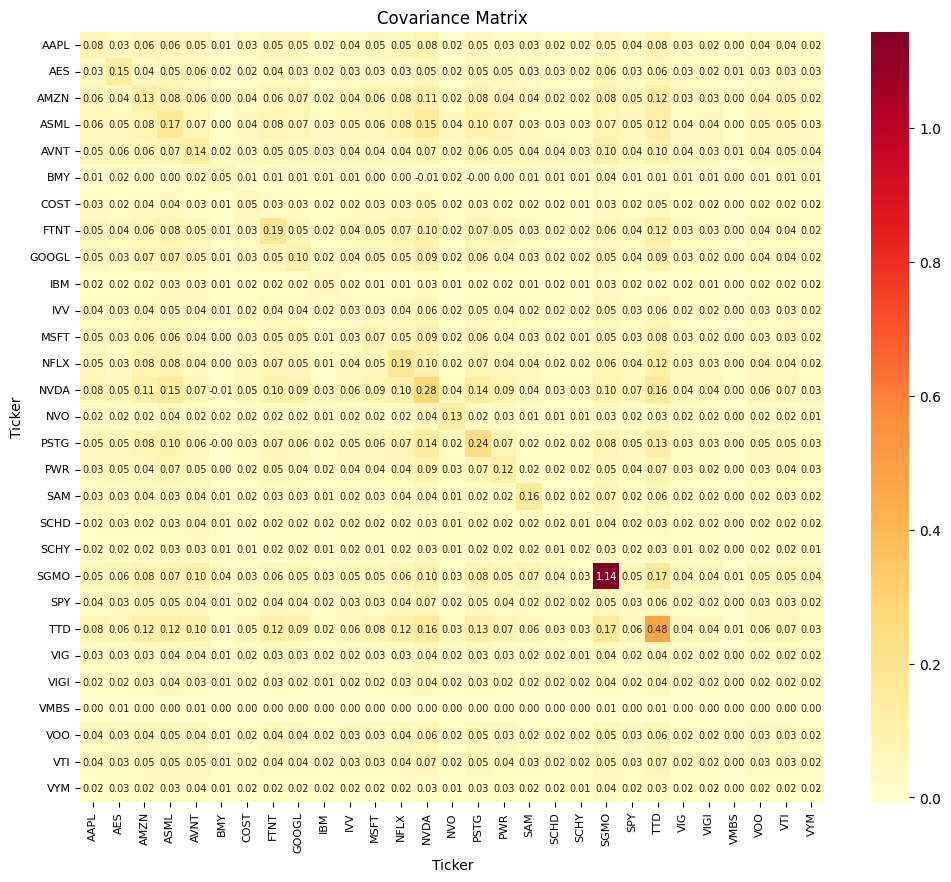

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cov, annot=True, fmt='.2f', cmap='YlOrRd',annot_kws={"size": 7})
plt.title('Covariance Matrix')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

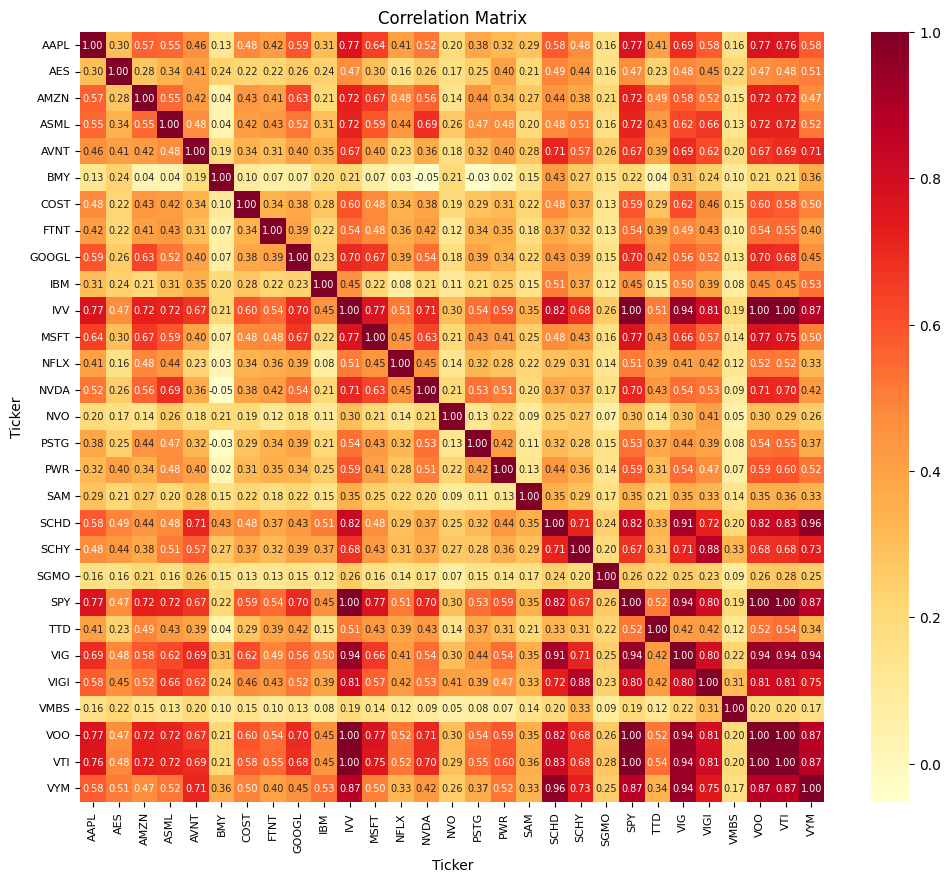

In [72]:
cor = retme.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, fmt='.2f', cmap='YlOrRd',annot_kws={"size": 7})
plt.title('Correlation Matrix')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()